In [1]:
import os
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science_Public/question_generation/Datasets/GEO'
os.chdir(proj_dir)


Mounted at /content/drive


In [2]:
trait = "Narcolepsy"
condition = 'Obesity'

In [3]:
!pip install sparse_lmm


In [4]:
data_root = '/content/drive/MyDrive/AI4Science_Public/question_generation/Datasets/GEO'

In [5]:
import gzip
import pandas as pd
import numpy as np
import os
import io


def read_gene_mapping_data(file_path):
    """ Process the metadata to get the mapping between gene names and gene probes.
    Some of the series only provide accession of gene in GenBank (e.g., GB_ACC), so you need to use GB_ACC to search for the gene name in GeneBank website.
    """
    with gzip.open(file_path, 'rt') as f:
        contents = f.read()
    # Remove the lines that start with '^, '!', and '#'
    lines = contents.split('\n')
    filtered_lines = [line for line in lines if
                      not (line.startswith('^') or line.startswith('!') or line.startswith('#'))]
    filtered_content = '\n'.join(filtered_lines)
    mapping_data = pd.read_csv(io.StringIO(filtered_content), delimiter='\t', low_memory=False)
    # Find the name of the column that stores the gene symbol
    standardized_cols = mapping_data.columns.str.lower().str.replace(' ', '_')
    gene_symbol_cols = mapping_data.columns[standardized_cols == 'gene_symbol']
    assert len(gene_symbol_cols) == 1, f"Expected one 'gene_symbol' column, found {len(gene_symbol_cols)}"
    gene_symbol_col = gene_symbol_cols[0]
    mapping_data = mapping_data.loc[:, ['ID', gene_symbol_col]]
    mapping_data = mapping_data.dropna()

    return mapping_data


condition_metadata_path = os.path.join(data_root, '3_Gene_FTO_Trait_Obesity/GSE78958/GSE78958_family.soft.gz')
condition_gene_mapping = read_gene_mapping_data(condition_metadata_path)
condition_gene_mapping

,ID,Gene Symbol
0,1007_s_at,DDR1 /// MIR4640
1,1053_at,RFC2
2,117_at,HSPA6
3,121_at,PAX8
4,1255_g_at,GUCA1A
...,...,...
22232,AFFX-HUMGAPDH/M33197_M_at,GAPDH
22233,AFFX-HUMISGF3A/M97935_3_at,STAT1
22234,AFFX-HUMISGF3A/M97935_5_at,STAT1
22235,AFFX-HUMISGF3A/M97935_MA_at,STAT1


In [6]:
condition_data_path = os.path.join(data_root, '3_Gene_FTO_Trait_Obesity/GSE78958/GSE78958_series_matrix.txt.gz')
condition_gene_data = pd.read_csv(condition_data_path, compression='gzip', skiprows=52, comment='!', delimiter='\t')
print("Gene Data:")
condition_gene_data = condition_gene_data.dropna()
condition_gene_data

Gene Data:


,ID_REF,GSM2082085,GSM2082086,GSM2082087,GSM2082088,GSM2082089,GSM2082090,GSM2082091,GSM2082092,GSM2082093,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
0,1007_s_at,11.28850,11.03150,11.16710,10.99510,10.59830,10.66480,10.46060,10.86280,10.67120,...,11.33190,11.07390,11.03590,11.50600,10.82540,10.57120,11.13250,10.37340,10.98720,11.38370
1,1053_at,7.63904,7.26402,7.68085,6.69447,7.03229,7.67410,7.13190,7.17344,7.72702,...,7.47437,6.75757,7.39019,7.42222,7.81756,7.35957,7.13813,8.34150,8.30056,6.88597
2,117_at,8.04600,6.95939,7.66881,7.20154,7.44421,6.81892,7.69349,7.17604,7.43512,...,6.59420,6.07500,8.91532,8.47447,8.86056,7.58294,9.00407,9.44754,8.49592,7.98684
3,121_at,8.40344,8.10701,7.64901,7.61717,7.88172,7.42525,8.52529,8.85369,7.66742,...,8.12033,7.94675,8.36161,8.24828,8.09233,7.56064,7.90098,7.96661,8.30756,8.30535
4,1255_g_at,3.25795,3.23091,3.15074,3.80748,3.35172,3.32401,3.40824,3.53437,3.24152,...,3.55685,3.33472,3.96949,3.23512,3.40241,4.27268,3.10499,3.29700,3.69600,3.95314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22272,AFFX-ThrX-5_at,3.88166,3.80152,3.66039,3.35783,3.70256,3.83488,3.67033,4.05419,3.32463,...,4.13470,4.15608,4.21411,4.09967,3.87734,3.94543,3.82307,4.03133,3.99748,4.12102
22273,AFFX-ThrX-M_at,3.91730,3.47960,2.86268,2.99534,3.04051,3.56954,3.59695,3.38818,3.07477,...,3.59862,3.50953,3.78166,3.48145,3.99519,4.08996,4.10022,6.06674,3.49158,3.50046
22274,AFFX-TrpnX-3_at,3.16477,3.17312,2.99680,2.97375,3.20824,3.05029,3.05519,3.09737,2.88569,...,3.33134,3.07075,3.28115,3.29891,3.00888,2.94178,2.97901,3.08126,3.14365,3.18247
22275,AFFX-TrpnX-5_at,3.75914,3.69434,3.79928,3.88686,3.91584,3.82882,4.11923,4.05000,3.68115,...,3.90579,3.98690,4.11565,4.22331,3.89235,3.84259,3.83147,3.79138,3.98642,3.93776


In [7]:
condition_gene_data = pd.merge(condition_gene_mapping.rename(columns={'ID': 'ID_REF'}), condition_gene_data, on='ID_REF').drop(columns='ID_REF').set_index('Gene Symbol')
# Converts the gene names to lower case
condition_gene_data.rename(str.lower, axis='index', inplace=True)
condition_gene_data

,GSM2082085,GSM2082086,GSM2082087,GSM2082088,GSM2082089,GSM2082090,GSM2082091,GSM2082092,GSM2082093,GSM2082094,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
ddr1 /// mir4640,11.28850,11.03150,11.16710,10.99510,10.59830,10.66480,10.46060,10.86280,10.67120,10.97620,...,11.33190,11.07390,11.03590,11.50600,10.82540,10.57120,11.13250,10.37340,10.98720,11.38370
rfc2,7.63904,7.26402,7.68085,6.69447,7.03229,7.67410,7.13190,7.17344,7.72702,6.81676,...,7.47437,6.75757,7.39019,7.42222,7.81756,7.35957,7.13813,8.34150,8.30056,6.88597
hspa6,8.04600,6.95939,7.66881,7.20154,7.44421,6.81892,7.69349,7.17604,7.43512,8.23233,...,6.59420,6.07500,8.91532,8.47447,8.86056,7.58294,9.00407,9.44754,8.49592,7.98684
pax8,8.40344,8.10701,7.64901,7.61717,7.88172,7.42525,8.52529,8.85369,7.66742,8.91888,...,8.12033,7.94675,8.36161,8.24828,8.09233,7.56064,7.90098,7.96661,8.30756,8.30535
guca1a,3.25795,3.23091,3.15074,3.80748,3.35172,3.32401,3.40824,3.53437,3.24152,3.47329,...,3.55685,3.33472,3.96949,3.23512,3.40241,4.27268,3.10499,3.29700,3.69600,3.95314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gapdh,13.65790,13.14960,11.71850,12.80670,12.77510,13.00240,11.84720,12.28220,13.50270,12.96300,...,13.39520,13.01440,12.57790,13.40130,13.73630,13.80570,13.98530,14.18820,13.18030,13.33330
stat1,10.41710,12.25150,10.37870,10.56050,11.34770,11.99420,9.99272,9.95901,12.43690,9.67842,...,9.90338,9.28871,9.31771,11.09760,10.70810,10.02190,11.34610,9.85467,11.89580,9.32593
stat1,3.46671,4.04243,3.25552,3.47548,3.52812,3.92416,3.23998,3.45656,3.76377,3.46457,...,3.40408,3.30393,3.34305,3.41187,3.66566,3.25408,3.77408,3.25113,4.22393,3.34183


In [8]:
trait_metadata_path = os.path.join(data_root, '89_Gene_HCRT_Trait_Narcolepsy/GSE17617/GSE17617_family.soft.gz')
trait_gene_mapping = read_gene_mapping_data(trait_metadata_path)
trait_gene_mapping

,ID,Gene Symbol
0,1415670_at,Copg1
1,1415671_at,Atp6v0d1
2,1415672_at,Golga7
3,1415673_at,Psph
4,1415674_a_at,Trappc4
...,...,...
45069,AFFX-PyruCarbMur/L09192_MA_at,Pcx
45070,AFFX-PyruCarbMur/L09192_MB_at,Pcx
45095,AFFX-TransRecMur/X57349_3_at,Tfrc
45096,AFFX-TransRecMur/X57349_5_at,Tfrc


In [9]:
trait_data_path = os.path.join(data_root, '89_Gene_HCRT_Trait_Narcolepsy/GSE17617/GSE17617_series_matrix.txt.gz')

trait_gene_data = pd.read_csv(trait_data_path, compression='gzip', skiprows=52, comment='!', delimiter='\t')
print("\nGene Data:")
trait_gene_data = trait_gene_data.dropna()
trait_gene_data


Gene Data:


,ID_REF,GSM439868,GSM439869,GSM439870,GSM439871,GSM439872,GSM439873,GSM439874,GSM439875,GSM439876,GSM439877,GSM439878,GSM439879,GSM439880,GSM439881,GSM439882,GSM439883,GSM439884,GSM439885
0,1415670_at,2637.59600,1854.29900,2338.80200,1864.47900,1691.56200,1412.27900,2051.56000,1531.09800,1145.73600,3677.671000,3876.25900,3396.176000,2972.68400,3654.989000,3033.57300,3322.59200,3740.68000,3084.74500
1,1415671_at,743.27470,372.10970,222.45700,342.83670,227.39110,129.90790,547.62650,407.66780,334.31250,2548.495000,2694.59500,1989.467000,2352.19800,2669.091000,2223.47400,2179.50300,3256.07000,2717.86900
2,1415672_at,2219.09600,1790.39300,3163.94700,3792.73200,3214.51700,5872.24600,3652.39100,3361.93000,3031.38300,3750.900000,4124.98100,3566.330000,4206.52000,4466.463000,3753.75500,4352.38700,4260.43500,4260.12900
3,1415673_at,483.00140,590.84580,526.11410,325.34180,414.91200,485.38140,733.13420,406.94610,430.82450,714.382900,763.98630,751.141500,742.45010,953.707000,767.01630,823.97510,793.42490,898.63950
4,1415674_a_at,45.66348,42.77694,247.30600,47.83135,34.01828,86.26760,85.51785,485.31630,76.00150,663.494400,602.14320,819.917400,631.23490,762.550500,868.29660,724.39470,842.48250,933.83370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45096,AFFX-TransRecMur/X57349_5_at,509.81710,480.76820,462.79140,633.63290,358.72370,684.48140,664.36370,762.71850,344.38420,1285.914000,1397.56300,988.066300,1111.14000,1401.472000,1177.20400,1250.24900,1368.85300,1182.11800
45097,AFFX-TransRecMur/X57349_M_at,196.41400,184.50660,198.14790,187.72850,30.65336,36.27432,129.33840,189.09950,91.71628,438.183300,435.33680,441.527300,546.12920,489.136900,509.65490,531.91880,595.81310,391.52190
45098,AFFX-TrpnX-3_at,14.34638,96.66200,27.08277,44.19871,74.12899,55.99105,63.12461,16.23195,58.36338,55.024580,38.04936,7.425402,68.37788,47.628570,51.13494,83.55426,47.47880,36.61749
45099,AFFX-TrpnX-5_at,125.50250,109.08940,18.25953,126.38880,15.39666,17.54450,39.98970,17.34576,57.28504,13.938790,62.58277,90.027380,121.77090,9.136945,28.62985,59.31858,11.97342,18.97694


In [11]:
trait_gene_data = pd.merge(trait_gene_mapping.rename(columns={'ID': 'ID_REF'}), trait_gene_data, on='ID_REF').drop(
    columns='ID_REF').set_index('Gene Symbol')
# Converts the gene names to lower case
trait_gene_data.rename(str.lower, axis='index', inplace=True)
trait_gene_data

,GSM439868,GSM439869,GSM439870,GSM439871,GSM439872,GSM439873,GSM439874,GSM439875,GSM439876,GSM439877,GSM439878,GSM439879,GSM439880,GSM439881,GSM439882,GSM439883,GSM439884,GSM439885
Gene Symbol,,,,,,,,,,,,,,,,,,
copg1,2637.59600,1854.29900,2338.80200,1864.47900,1691.56200,1412.27900,2051.56000,1531.09800,1145.73600,3677.6710,3876.25900,3396.1760,2972.6840,3654.98900,3033.5730,3322.5920,3740.6800,3084.74500
atp6v0d1,743.27470,372.10970,222.45700,342.83670,227.39110,129.90790,547.62650,407.66780,334.31250,2548.4950,2694.59500,1989.4670,2352.1980,2669.09100,2223.4740,2179.5030,3256.0700,2717.86900
golga7,2219.09600,1790.39300,3163.94700,3792.73200,3214.51700,5872.24600,3652.39100,3361.93000,3031.38300,3750.9000,4124.98100,3566.3300,4206.5200,4466.46300,3753.7550,4352.3870,4260.4350,4260.12900
psph,483.00140,590.84580,526.11410,325.34180,414.91200,485.38140,733.13420,406.94610,430.82450,714.3829,763.98630,751.1415,742.4501,953.70700,767.0163,823.9751,793.4249,898.63950
trappc4,45.66348,42.77694,247.30600,47.83135,34.01828,86.26760,85.51785,485.31630,76.00150,663.4944,602.14320,819.9174,631.2349,762.55050,868.2966,724.3947,842.4825,933.83370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pcx,160.94410,302.17650,80.37859,265.19030,107.25010,248.45660,193.71990,98.50684,269.98600,162.0981,243.71720,298.6101,279.3090,226.58470,258.4336,202.1282,228.3196,130.15050
pcx,35.72246,109.64640,31.69945,55.12823,17.86674,137.42590,58.95641,160.29670,125.06070,176.0812,83.69185,115.5760,124.7047,94.72413,114.6087,159.1468,102.0021,60.08628
tfrc,287.09430,422.92500,245.03210,377.76500,158.42960,237.34830,257.84410,223.21600,250.84630,660.7780,429.48050,509.6090,749.3054,539.80680,696.8027,763.6659,566.1776,598.23030


In [12]:
trait_gene_rel_path = os.path.join(os.path.dirname(data_root), 'Summary_Corresponding_Gene_Symbol.csv')

trait_gene_rel = pd.read_csv(trait_gene_rel_path)
trait_gene_rel = trait_gene_rel.loc[:, ['Trait name', 'Corresponding_Gene_Symbol']].set_index('Trait name')
# Convert to lower case
trait_gene_rel = trait_gene_rel.apply(lambda x: x.astype(str).str.lower())
trait_gene_rel.index = trait_gene_rel.index.str.lower()
trait_gene_rel

,Corresponding_Gene_Symbol
Trait name,
breast cancer,"brca2, cdh1, ppm1d, pik3ca, kras, akt1, tp53, ..."
cystic fibrosis,"cftr, fcgr2a, tgfb1, kif21a, cdc73, crb2, rnaset2"
obesity,"lep, pparg, pomc, mc4r, enpp1, adcy3"
sickle cell anemia,"hbb, trnt1, gata1, fancb, fanca, fancf, fancc,..."
huntington's disease,"prnp, jph3, htt, gba1, mpz, psen1, apoe, gdap1..."
...,...
metabolic rate,"adrb1, mmp1, rnf212, dyrk1b, cela2a, slc25a42,..."
von willebrand disease,"vwf, gp1ba, vwa5a, vwa7, vwce, vwc2, svep1, vw..."
werner syndrome,"wrn, wrnip1, fgfr2, fbn1, mecp2, flna, tp63, t..."


In [13]:
condition_related_genes = trait_gene_rel.loc[condition.lower()].tolist()[0].lower().strip().split(',')
condition_related_genes = [gn.strip() for gn in condition_related_genes]
print(f"Genes related to the condition '{condition}' according to domain knowledge, {condition_related_genes}")

Genes related to the condition 'Obesity' according to domain knowledge, ['lep', 'pparg', 'pomc', 'mc4r', 'enpp1', 'adcy3']


In [14]:
genes_in_condition_data = condition_gene_data.index.tolist()
genes_in_trait_data = trait_gene_data.index.tolist()

common_genes_condition = set(condition_related_genes).intersection(genes_in_condition_data)
if len(common_genes_condition) == 0:
    print("No candidate genes found in the dataset for the condition '{CONDITION}'.")
else:
    common_genes = set(genes_in_trait_data).intersection(common_genes_condition)
    if len(common_genes) > 0:
        gene_regressors_for_condition = list(common_genes)
        print(f"The trait and condition datasets contain {len(common_genes)} candidate genes in common, such as {gene_regressors_for_condition[:10]}. Therefore, the data can be used for the two-stage regression analysis. ")
    else:
        print(f"The condition and trait datasets do not have candidate genes in common")


The trait and condition datasets contain 5 candidate genes in common, such as ['lep', 'enpp1', 'pomc', 'adcy3', 'pparg']. Therefore, the data can be used for the two-stage regression analysis. 


In [15]:
# Read clinical information to get the trait. Note that clear understanding on this information is necessary.
def extract_lines_with_prefix(file_path, prefixes):
    filtered_lines = []
    with gzip.open(file_path, 'rt') as f:
        contents = f.read()
    lines = contents.split('\n')
    for line in lines:
        line = line.strip()
        for prefix in prefixes:
            if line.startswith(prefix):
                filtered_lines.append(line)
                break
    return filtered_lines

candidate_prefixes = ['!Sample_geo_accession', '!Series_title', '!Series_summary', '!Series_overall_design', '!Sample_characteristics_ch1']

def read_background_information(file_path, prefixes):
    filtered_lines = extract_lines_with_prefix(file_path, prefixes)
    filtered_content = '\n'.join(filtered_lines)
    return filtered_content

trait_filtered_content = read_background_information(trait_data_path, candidate_prefixes)
print(trait_filtered_content)

!Series_title	"Gene profiling within the orexin-producing neurons"
!Series_summary	"Narcolepsy is a sleep disorder characterized by excessive daytime sleepiness and attacks of muscle atonia triggered by strong emotions (cataplexy). The best biological marker of narcolepsy is orexin deficiency with dramatic loss in hypothalamic orexin-producing neurons. Together with a tight HLA and T-cell receptor alpha(5) association, narcolepsy is believed to be autoimmune although all attempts to prove it have failed.To characterize orexin specific peptides we produced a transgenic mouse model to access to the orexin neurons transcription profile. We generated BAC-based transgenic mice by replacing the orexin coding sequence by a flag-tagged poly(A) binding protein (Pabp1) cDNA sequence. The basis of this construct is to take advantage of the ability of Pabp1 to bind to the poly(A) tails of mRNAs in vivo. Thus mRNAs from orexin cells are expected to be enriched by cross-linking them to the flag-tagg

In [32]:
def filter_label_info(file_path, prefixes):
    filtered_lines = extract_lines_with_prefix(file_path, prefixes)
    filtered_content = '\n'.join(filtered_lines)
    clinical_data = pd.read_csv(io.StringIO(filtered_content), delimiter='\t', low_memory=False)
    return clinical_data

prefixes = ['!Sample_geo_accession', '!Sample_characteristics_ch1']
trait_clinical_data = filter_label_info(trait_data_path, prefixes)
trait_clinical_data

,!Sample_geo_accession,GSM439868,GSM439869,GSM439870,GSM439871,GSM439872,GSM439873,GSM439874,GSM439875,GSM439876,GSM439877,GSM439878,GSM439879,GSM439880,GSM439881,GSM439882,GSM439883,GSM439884,GSM439885
0,!Sample_characteristics_ch1,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J,strain: C57BL/6J X DBA/2J
1,!Sample_characteristics_ch1,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks,age: 11 and 14 weeks


In [33]:
def add_and_convert_label(gene_data, clinical_data, row_id, label_name, mapping_dict):
    clinical_data = clinical_data.iloc[row_id:row_id+1, 1:]
    clinical_data.index = [label_name]
    merged_data = pd.concat([gene_data, clinical_data])
    # Convert labels to integers
    merged_data.loc[label_name] = merged_data.loc[label_name].replace(mapping_dict)
    # Drop columns where the TRAIT row is not 0 or 1
    mask = merged_data.loc[label_name].isin([0, 1])
    merged_data = merged_data.loc[:, mask]
    merged_data = merged_data.astype(float).T
    # Delete duplicate column names and save only one of the columns
    merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]
    return merged_data

In [34]:
trait_row_id = 0
trait_mapping_dict = {
    'strain: C57BL/6J X DBA/2J': 0
}
trait_merged_data = add_and_convert_label(trait_gene_data, trait_clinical_data, trait_row_id, trait, trait_mapping_dict)



In [36]:
trait_merged_data


,copg1,atp6v0d1,golga7,psph,trappc4,dpm2,psmb5,dhrs1,ppm1a,psenen,...,mc5r,ap2a1,adss,acrbp /// ing4,eif2b1,ppl,zmiz2,alg3,gapdh,Narcolepsy
GSM439868,2637.596,743.2747,2219.096,483.0014,45.66348,679.5574,141.129400,329.89990,1505.3820,635.0087,...,83.71928,718.8437,711.5353,363.3252,302.90230,39.17744,1018.7420,223.68730,10061.190,0.0
GSM439869,1854.299,372.1097,1790.393,590.8458,42.77694,446.4242,9.761699,111.62290,708.1030,552.6367,...,30.04660,656.9586,1322.7720,442.9117,193.07500,16.73744,1111.6380,577.42930,10447.750,0.0
GSM439870,2338.802,222.4570,3163.947,526.1141,247.30600,1054.5880,17.701610,170.30470,1680.9860,285.4238,...,102.16540,480.1629,962.3773,443.0918,64.97275,13.88384,479.5593,163.67210,8582.375,0.0
GSM439871,1864.479,342.8367,3792.732,325.3418,47.83135,557.8625,23.482830,282.39060,1766.2170,505.6704,...,102.45400,717.6602,1023.0700,233.7760,93.19024,13.99984,971.2762,138.52990,8401.005,0.0
GSM439872,1691.562,227.3911,3214.517,414.9120,34.01828,649.3644,24.728630,426.34150,1299.3640,462.9743,...,63.77678,448.8982,1261.2430,450.7373,270.89390,127.87690,358.6536,112.55970,7507.632,0.0
GSM439873,1412.279,129.9079,5872.246,485.3814,86.26760,1111.0470,22.539850,448.31330,955.0397,346.4453,...,164.93830,841.6095,1028.8380,443.2119,147.53280,17.16946,202.2038,139.19600,5276.632,0.0
GSM439874,2051.560,547.6265,3652.391,733.1342,85.51785,846.4034,70.945500,295.42270,850.9974,614.7767,...,122.78390,808.1177,1310.3230,619.0330,351.21970,89.21376,578.6367,83.54187,7944.712,0.0
GSM439875,1531.098,407.6678,3361.930,406.9461,485.31630,891.6569,9.059089,64.15476,1128.4000,291.9638,...,122.22960,486.0666,1509.1950,429.4161,82.03340,27.05395,550.6700,51.56786,8173.260,0.0
GSM439876,1145.736,334.3125,3031.383,430.8245,76.00150,727.4397,12.612510,388.51100,1817.4070,395.3838,...,204.69060,584.5370,2019.8870,474.6580,450.83790,30.20512,654.5541,148.66370,5692.136,0.0
GSM439877,3677.671,2548.4950,3750.900,714.3829,663.49440,730.0004,494.060500,1083.18100,2688.9370,928.9456,...,110.20700,1198.9460,1731.6030,438.0598,498.24270,95.27571,1319.5690,196.85720,10818.090,0.0


In [37]:
condition_filtered_content = read_background_information(condition_data_path, candidate_prefixes)
print(condition_filtered_content)

!Series_title	"Effect of obesity on molecular characteristics of invasive breast tumors: gene expression analysis of 405 tumors by BMI"
!Series_summary	"Background: Obesity is a risk factor for breast cancer in postmenopausal women and is associated with decreased survival and less favorable clinical characteristics such as greater tumor burden, higher grade, and poor prognosis, regardless of menopausal status. Despite the negative impact of obesity on clinical outcome, molecular mechanisms through which excess adiposity influences breast cancer etiology are not well-defined."
!Series_summary	""
!Series_summary	"Methods: Affymetrix U133 2.0 gene expression data were generated for 405 primary breast tumors using RNA isolated from laser microdissected tissues.  Patients were classified as normal-weight (BMI<25), overweight (BMI 25-29.9) or obese (BMI>30). Statistical analysis was performed by ANOVA using Partek Genomics Suite version 6.6 using a false discovery rate <0.05 to define signi

In [38]:

condition_clinical_data = filter_label_info(condition_data_path, prefixes)
condition_clinical_data

,!Sample_geo_accession,GSM2082085,GSM2082086,GSM2082087,GSM2082088,GSM2082089,GSM2082090,GSM2082091,GSM2082092,GSM2082093,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
0,!Sample_characteristics_ch1,patient ethnicity: European American,patient ethnicity: African American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,...,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: Asian,patient ethnicity: European American
1,!Sample_characteristics_ch1,bmi: 25-29.99,bmi: 30+,bmi: Unk,bmi: 25-29.99,bmi: Unk,bmi: Unk,bmi: <25,bmi: <25,bmi: <25,...,bmi: 25-29.99,bmi: <25,bmi: 25-29.99,bmi: 25-29.99,bmi: 30+,bmi: 25-29.99,bmi: 30+,bmi: 30+,bmi: 30+,bmi: 25-29.99
2,!Sample_characteristics_ch1,tumor grade: Moderately differentiated (grade 2),tumor grade: Poorly differentiated (grade 3),tumor grade: Moderately differentiated (grade 2),tumor grade: Moderately differentiated (grade 2),tumor grade: Moderately differentiated (grade 2),tumor grade: Poorly differentiated (grade 3),tumor grade: Well-differentiated (grade 1),tumor grade: Moderately differentiated (grade 2),tumor grade: Poorly differentiated (grade 3),...,tumor grade: Moderately differentiated (grade 2),tumor grade: Moderately differentiated (grade 2),tumor grade: Moderately differentiated (grade 2),tumor grade: Moderately differentiated (grade 2),tumor grade: Poorly differentiated (grade 3),tumor grade: Well-differentiated (grade 1),tumor grade: Moderately differentiated (grade 2),tumor grade: Poorly differentiated (grade 3),tumor grade: Poorly differentiated (grade 3),tumor grade: Well-differentiated (grade 1)
3,!Sample_characteristics_ch1,tumor subtype (via breastprs): Basal Like,tumor subtype (via breastprs): Luminal B,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Basal Like,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Basal Like,...,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): HER2 enriched,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal B,tumor subtype (via breastprs): Luminal B,tumor subtype (via breastprs): HER2 enriched
4,!Sample_characteristics_ch1,tumor stage: Stage IV,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage IIB,...,tumor stage: Stage IIIA,tumor stage: Stage IIB,tumor stage: Stage IIB,tumor stage: Stage I,tumor stage: Stage IIA,tumor stage: Stage IIA,tumor stage: Stage IIB,tumor stage: Stage IIA,tumor stage: Stage IIB,tumor stage: Stage IIA


In [39]:
condition_row_id = 1
condition_mapping_dict = {
    'bmi: 25-29.99': 1,
    'bmi: 30+': 1,
    'bmi: <25': 0,
    'bmi: Unk': 'NaN'
}
condition_merged_data = add_and_convert_label(condition_gene_data, condition_clinical_data, condition_row_id, condition, condition_mapping_dict)



In [40]:
condition_merged_data


,ddr1 /// mir4640,rfc2,hspa6,pax8,guca1a,mir5193 /// uba7,thra,ptpn21,ccl5,cyp2e1,...,rbm12b,lime1 /// zgpat,loc102725263 /// loc389906,c1orf50 /// loc100129924,fam86b1 /// fam86b2 /// fam86c1 /// fam86dp /// fam86fp,snhg17,hnrnpul2 /// hnrnpul2-bscl2,loc100505915,npepl1,Obesity
GSM2082085,11.2885,7.63904,8.04600,8.40344,3.25795,8.05970,6.63689,4.75744,8.40618,4.69205,...,6.12818,7.75356,7.56790,11.18190,6.05328,9.33699,4.68995,5.72755,7.98134,1.0
GSM2082086,11.0315,7.26402,6.95939,8.10701,3.23091,10.41240,6.28016,4.52108,11.12200,5.81927,...,6.54698,9.05333,6.95101,8.18527,6.38763,8.90347,4.79603,5.86346,8.37890,1.0
GSM2082088,10.9951,6.69447,7.20154,7.61717,3.80748,8.96073,7.90418,4.97383,6.65283,5.33041,...,6.76359,8.29754,6.48220,7.94071,5.77588,8.31223,5.35112,5.82768,8.37370,1.0
GSM2082091,10.4606,7.13190,7.69349,8.52529,3.40824,8.42508,6.86701,4.71153,7.28238,5.15446,...,6.54715,8.43456,5.82321,8.11559,5.74284,7.64574,4.83996,5.70674,8.56033,0.0
GSM2082092,10.8628,7.17344,7.17604,8.85369,3.53437,9.02160,7.53711,5.16490,8.23587,5.02463,...,6.71470,8.53661,5.97410,7.87469,5.73039,8.05470,5.42745,6.77743,7.67465,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2082504,10.5712,7.35957,7.58294,7.56064,4.27268,8.02483,5.88674,5.34237,6.88326,5.63401,...,6.14906,8.95018,5.80480,7.48590,4.47808,8.42845,4.53402,6.50500,7.58154,1.0
GSM2082505,11.1325,7.13813,9.00407,7.90098,3.10499,9.09641,6.12608,4.87057,7.86825,6.57249,...,6.09851,8.67411,6.14987,8.01449,4.61302,8.35374,4.36877,6.70659,7.82552,1.0
GSM2082506,10.3734,8.34150,9.44754,7.96661,3.29700,8.06249,6.08158,5.00834,6.66686,4.88439,...,6.59843,9.08551,4.85716,8.42367,4.60361,8.10976,4.38457,6.34209,7.69966,1.0
GSM2082507,10.9872,8.30056,8.49592,8.30756,3.69600,9.54351,6.93919,4.72445,9.33906,4.79058,...,6.06561,8.56240,5.56165,7.36009,5.20572,9.45472,4.90324,5.65996,7.93621,1.0


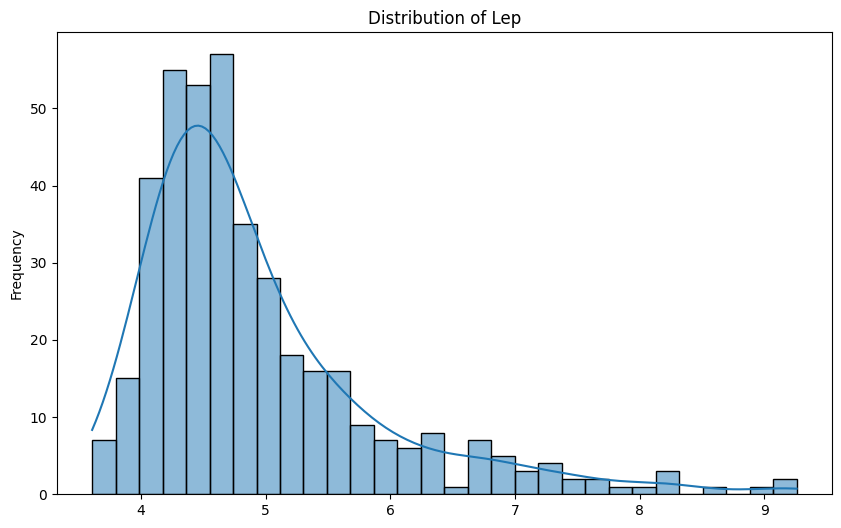

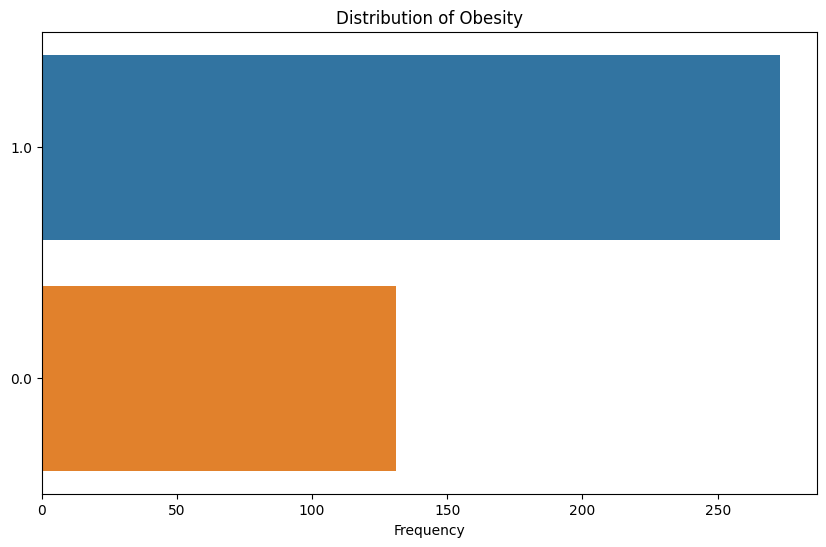

In [41]:
condition_feature_cols = condition_merged_data.columns.tolist()[:-1]
gene_list = [gene_regressors_for_condition[0]]  # Only show one gene
import seaborn as sns
import matplotlib.pyplot as plt


def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()


def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()


def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)


# Sample usage:
analyze_distributions(condition_merged_data, numerical_columns=[*gene_list], categorical_columns=[condition])


In [42]:
def normalize_data(X_train, X_test=None):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    # Handling columns with std = 0
    std_no_zero = np.where(std == 0, 1, std)

    # Normalize X_train
    X_train_normalized = (X_train - mean) / std_no_zero
    # Set normalized values to 0 where std was 0
    X_train_normalized[:, std == 0] = 0

    if X_test is not None:
        X_test_normalized = (X_test - mean) / std_no_zero
        X_test_normalized[:, std == 0] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized



In [43]:
from sklearn.linear_model import LogisticRegression

# k-fold cross-validation for the linear regression model used for prediction
def cross_validation_for_prediction(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = normalize_data(X_train, X_test)

        # Use the LogisticRegression model to train and predict
        model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Calculate accuracy for this fold
        accuracy = np.mean(predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)


X_condition = condition_merged_data[gene_regressors_for_condition].values
y_condition = condition_merged_data[condition].values

X_condition, _ = normalize_data(X_condition)
print(cross_validation_for_prediction(X_condition, y_condition))



0.6675


In [44]:
print("Common gene regressors for condition and trait", gene_regressors_for_condition)
X_condition = condition_merged_data[gene_regressors_for_condition].values
y_condition = condition_merged_data[condition].values

X_condition, _ = normalize_data(X_condition)

model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_condition, y_condition)
# Implementing k-fold cross-validation


Common gene regressors for condition and trait ['lep', 'enpp1', 'pomc', 'adcy3', 'pparg']


LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [45]:
# Select relevant columns and convert to numpy array
X_new_regressors = trait_merged_data[gene_regressors_for_condition].values
X_old_regressors = condition_merged_data[gene_regressors_for_condition].values
# Use the statistics of common genes in the condition dataset, to account for possible distribution shifts in the trait dataset
X_old_regressors, X_new_regressors = normalize_data(X_old_regressors, X_new_regressors)

predictions_condition = model.predict_proba(X_new_regressors)[:, 1]


In [46]:
trait_merged_data.insert(0, condition, predictions_condition)
trait_merged_data = trait_merged_data.drop(columns=gene_regressors_for_condition)
trait_merged_data


,Obesity,copg1,atp6v0d1,golga7,psph,trappc4,dpm2,psmb5,dhrs1,ppm1a,...,mc5r,ap2a1,adss,acrbp /// ing4,eif2b1,ppl,zmiz2,alg3,gapdh,Narcolepsy
GSM439868,3.189283e-22,2637.596,743.2747,2219.096,483.0014,45.66348,679.5574,141.129400,329.89990,1505.3820,...,83.71928,718.8437,711.5353,363.3252,302.90230,39.17744,1018.7420,223.68730,10061.190,0.0
GSM439869,1.312997e-17,1854.299,372.1097,1790.393,590.8458,42.77694,446.4242,9.761699,111.62290,708.1030,...,30.04660,656.9586,1322.7720,442.9117,193.07500,16.73744,1111.6380,577.42930,10447.750,0.0
GSM439870,1.241665e-29,2338.802,222.4570,3163.947,526.1141,247.30600,1054.5880,17.701610,170.30470,1680.9860,...,102.16540,480.1629,962.3773,443.0918,64.97275,13.88384,479.5593,163.67210,8582.375,0.0
GSM439871,3.041729e-14,1864.479,342.8367,3792.732,325.3418,47.83135,557.8625,23.482830,282.39060,1766.2170,...,102.45400,717.6602,1023.0700,233.7760,93.19024,13.99984,971.2762,138.52990,8401.005,0.0
GSM439872,5.250993e-01,1691.562,227.3911,3214.517,414.9120,34.01828,649.3644,24.728630,426.34150,1299.3640,...,63.77678,448.8982,1261.2430,450.7373,270.89390,127.87690,358.6536,112.55970,7507.632,0.0
GSM439873,6.934405e-31,1412.279,129.9079,5872.246,485.3814,86.26760,1111.0470,22.539850,448.31330,955.0397,...,164.93830,841.6095,1028.8380,443.2119,147.53280,17.16946,202.2038,139.19600,5276.632,0.0
GSM439874,1.295637e-18,2051.560,547.6265,3652.391,733.1342,85.51785,846.4034,70.945500,295.42270,850.9974,...,122.78390,808.1177,1310.3230,619.0330,351.21970,89.21376,578.6367,83.54187,7944.712,0.0
GSM439875,4.249168e-10,1531.098,407.6678,3361.930,406.9461,485.31630,891.6569,9.059089,64.15476,1128.4000,...,122.22960,486.0666,1509.1950,429.4161,82.03340,27.05395,550.6700,51.56786,8173.260,0.0
GSM439876,1.021536e-45,1145.736,334.3125,3031.383,430.8245,76.00150,727.4397,12.612510,388.51100,1817.4070,...,204.69060,584.5370,2019.8870,474.6580,450.83790,30.20512,654.5541,148.66370,5692.136,0.0
GSM439877,1.581328e-50,3677.671,2548.4950,3750.900,714.3829,663.49440,730.0004,494.060500,1083.18100,2688.9370,...,110.20700,1198.9460,1731.6030,438.0598,498.24270,95.27571,1319.5690,196.85720,10818.090,0.0


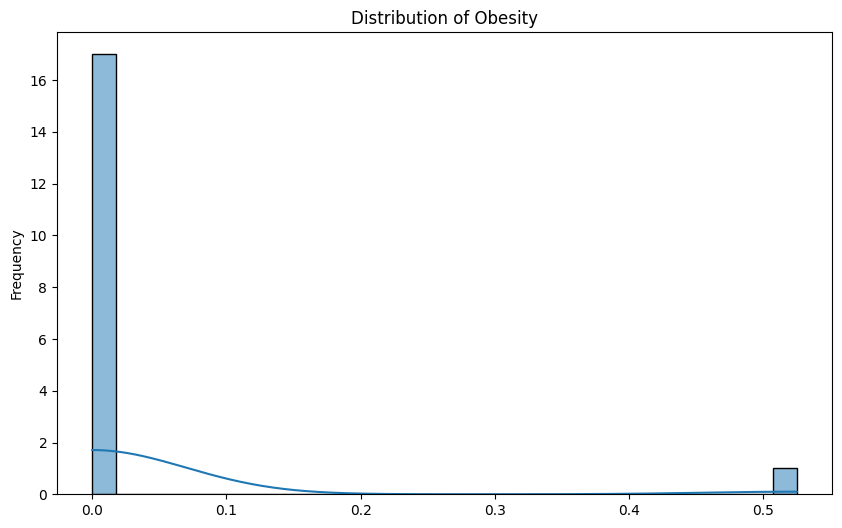

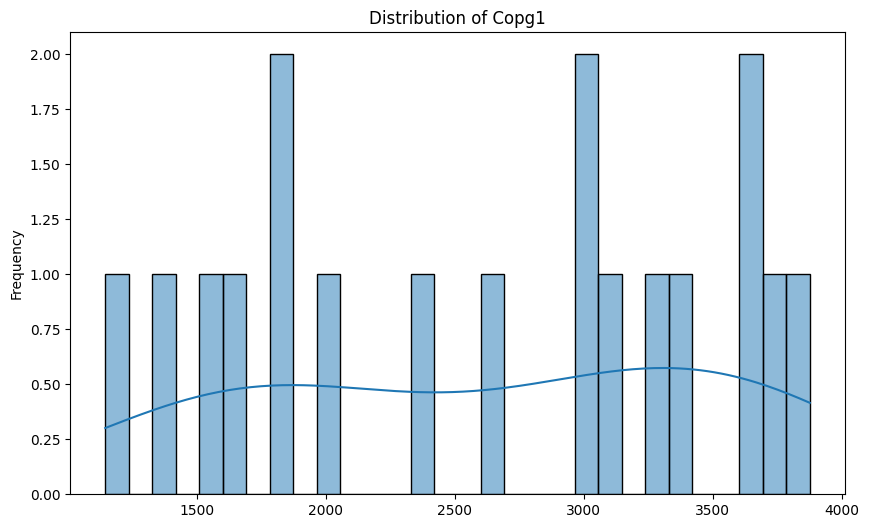

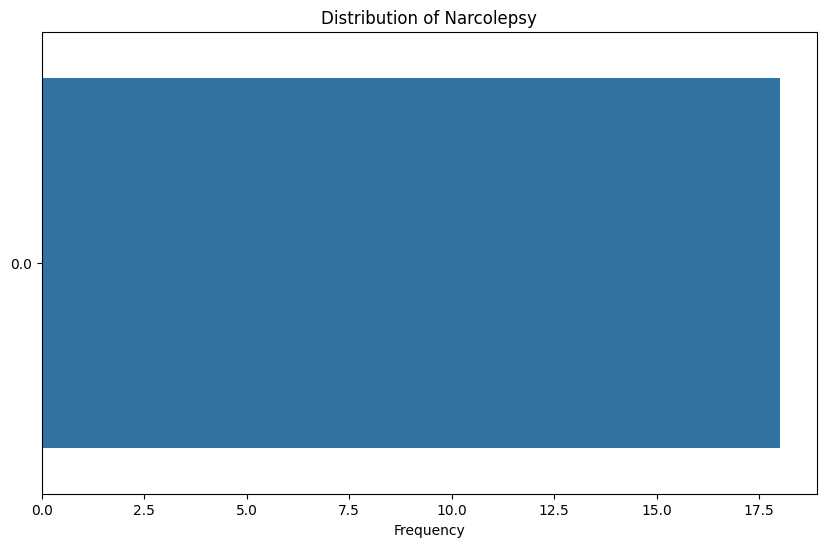

In [47]:
trait_feature_cols = trait_merged_data.columns.tolist()[:-1]
gene_list = [trait_feature_cols[1]]

# Sample usage:
analyze_distributions(trait_merged_data, numerical_columns=[condition, *gene_list], categorical_columns=[trait])



In [48]:
from sparse_lmm import VariableSelection

# k-fold cross-validation for the variable selection model
def cross_validation_for_var_select(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = normalize_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)


# Select relevant columns and convert to numpy array
X_trait = trait_merged_data.drop(columns=[trait]).values
y_trait = trait_merged_data[trait].values
cv_mean, cv_std = cross_validation_for_var_select(X_trait, y_trait)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')


/usr/local/lib/python3.10/dist-packages/numpy/lib/scimath.py:296: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


The cross-validation accuracy is 100.00% ± 0.00%


In [49]:
trait_merged_data


,Obesity,copg1,atp6v0d1,golga7,psph,trappc4,dpm2,psmb5,dhrs1,ppm1a,...,mc5r,ap2a1,adss,acrbp /// ing4,eif2b1,ppl,zmiz2,alg3,gapdh,Narcolepsy
GSM439868,3.189283e-22,2637.596,743.2747,2219.096,483.0014,45.66348,679.5574,141.129400,329.89990,1505.3820,...,83.71928,718.8437,711.5353,363.3252,302.90230,39.17744,1018.7420,223.68730,10061.190,0.0
GSM439869,1.312997e-17,1854.299,372.1097,1790.393,590.8458,42.77694,446.4242,9.761699,111.62290,708.1030,...,30.04660,656.9586,1322.7720,442.9117,193.07500,16.73744,1111.6380,577.42930,10447.750,0.0
GSM439870,1.241665e-29,2338.802,222.4570,3163.947,526.1141,247.30600,1054.5880,17.701610,170.30470,1680.9860,...,102.16540,480.1629,962.3773,443.0918,64.97275,13.88384,479.5593,163.67210,8582.375,0.0
GSM439871,3.041729e-14,1864.479,342.8367,3792.732,325.3418,47.83135,557.8625,23.482830,282.39060,1766.2170,...,102.45400,717.6602,1023.0700,233.7760,93.19024,13.99984,971.2762,138.52990,8401.005,0.0
GSM439872,5.250993e-01,1691.562,227.3911,3214.517,414.9120,34.01828,649.3644,24.728630,426.34150,1299.3640,...,63.77678,448.8982,1261.2430,450.7373,270.89390,127.87690,358.6536,112.55970,7507.632,0.0
GSM439873,6.934405e-31,1412.279,129.9079,5872.246,485.3814,86.26760,1111.0470,22.539850,448.31330,955.0397,...,164.93830,841.6095,1028.8380,443.2119,147.53280,17.16946,202.2038,139.19600,5276.632,0.0
GSM439874,1.295637e-18,2051.560,547.6265,3652.391,733.1342,85.51785,846.4034,70.945500,295.42270,850.9974,...,122.78390,808.1177,1310.3230,619.0330,351.21970,89.21376,578.6367,83.54187,7944.712,0.0
GSM439875,4.249168e-10,1531.098,407.6678,3361.930,406.9461,485.31630,891.6569,9.059089,64.15476,1128.4000,...,122.22960,486.0666,1509.1950,429.4161,82.03340,27.05395,550.6700,51.56786,8173.260,0.0
GSM439876,1.021536e-45,1145.736,334.3125,3031.383,430.8245,76.00150,727.4397,12.612510,388.51100,1817.4070,...,204.69060,584.5370,2019.8870,474.6580,450.83790,30.20512,654.5541,148.66370,5692.136,0.0
GSM439877,1.581328e-50,3677.671,2548.4950,3750.900,714.3829,663.49440,730.0004,494.060500,1083.18100,2688.9370,...,110.20700,1198.9460,1731.6030,438.0598,498.24270,95.27571,1319.5690,196.85720,10818.090,0.0


In [50]:
var_select = VariableSelection()

X_trait = trait_merged_data.drop(columns=[trait]).values
y_trait = trait_merged_data[trait].values
X_trait, _ = normalize_data(X_trait)

# Fit the model
var_select.fit(X_trait, y_trait)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]


/usr/local/lib/python3.10/dist-packages/numpy/lib/scimath.py:296: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


In [51]:
import pandas as pd
from statsmodels.stats.multitest import multipletests

# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': trait_feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")


Effect of the condition on the target variable:
Variable: Obesity
Coefficient: 0.0000
p-value: 1



In [52]:
threshold = 0.4

# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(
    f"Genes affecting the trait '{trait}' conditional on the factor '{condition}', with corrected p-value < {threshold}:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")


Genes affecting the trait 'Narcolepsy' conditional on the factor 'Obesity', with corrected p-value < 0.4:
Empty DataFrame
Columns: [Variable, Coefficient, corrected_p_value]
Index: []

Found 0 significant genes with corrected p-value < 0.4
